In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Extra steps

In [2]:
folder = '/home/arnaud/POMDP_PBVI_Exploration/Experiments/Olfactory Navigation/Test_olf_nav_alt_20240129_175343/GridSimulations/'
files = os.listdir(folder)

extra_steps = []

for f in files:
    df = pd.read_csv(folder + f)
    extra_steps.append(df['extra_steps'].to_list())

extra_steps = np.array(extra_steps)

In [3]:
extra_steps_grid = extra_steps.reshape((17,17,780))

In [13]:
extra_steps_averages = np.average(extra_steps_grid, axis=2)

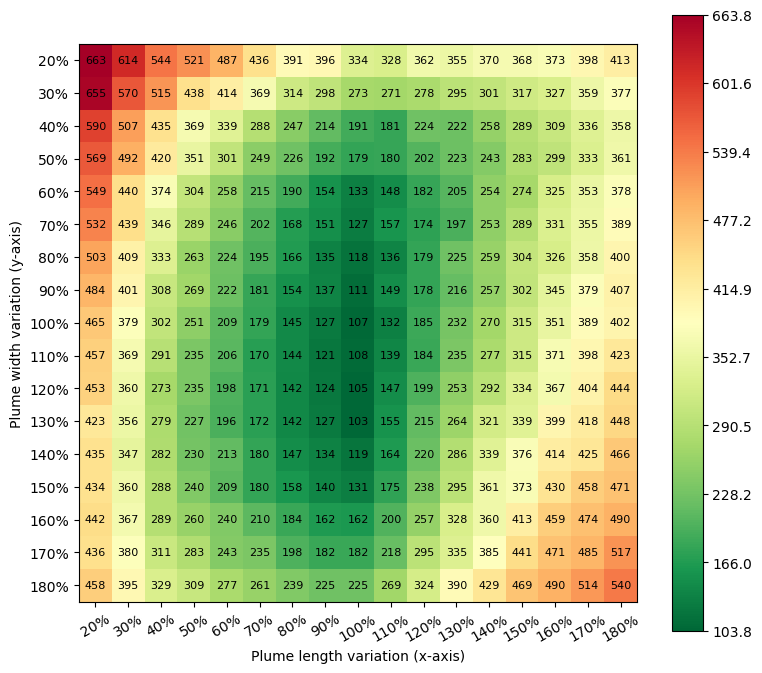

In [24]:
plt.figure(figsize=(9,8))

plt.imshow(extra_steps_averages.T, cmap='RdYlGn_r')
plt.colorbar(ticks=np.linspace(np.min(extra_steps_averages), np.max(extra_steps_averages), 10))

for i in range(17):
    for j in range(17):
        plt.annotate(int(extra_steps_averages[i,j]), (i,j), ha='center', va='center', fontsize=8)

plt.xticks(list(range(17)), [f'{i*10}%' for i in range(2,19)], rotation=30)
plt.yticks(list(range(17)), [f'{i*10}%' for i in range(2,19)])

plt.xlabel('Plume length variation (x-axis)')
plt.ylabel('Plume width variation (y-axis)')

plt.show()

# Unconverged

In [30]:
unconverged_percentage = []
sim_count = 780

for f in files:
    df = pd.read_csv(folder + f)
    unconverged_percentage.append(((df['steps_taken'] == 1001).sum() * 100) / sim_count)

unconverged_percentage = np.array(unconverged_percentage)

In [32]:
unconverged_percentage_grid = unconverged_percentage.reshape((17,17))

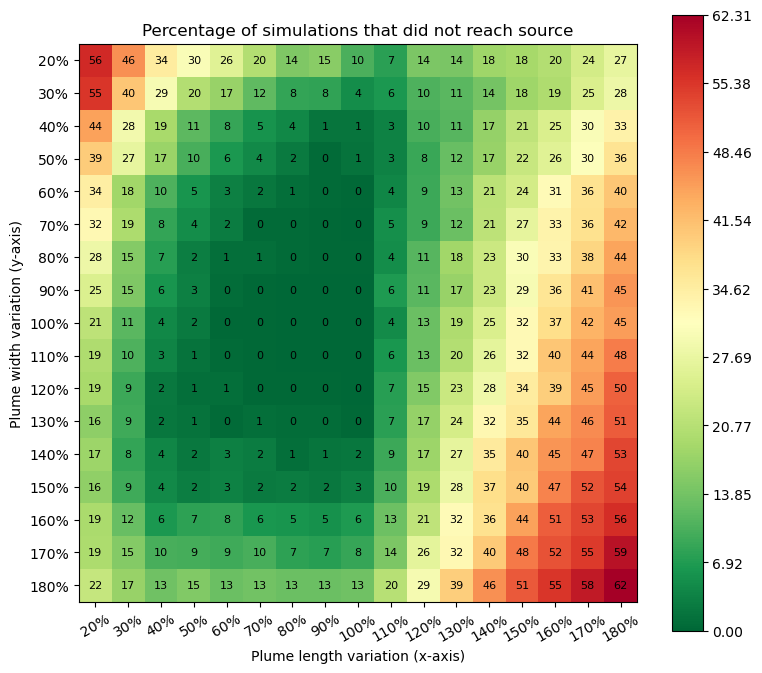

In [35]:
plt.figure(figsize=(9,8))
plt.title('Percentage of simulations that did not reach source')

plt.imshow(unconverged_percentage_grid.T, cmap='RdYlGn_r')
plt.colorbar(ticks=np.linspace(np.min(unconverged_percentage), np.max(unconverged_percentage), 10))

for i in range(17):
    for j in range(17):
        plt.annotate(int(unconverged_percentage_grid[i,j]), (i,j), ha='center', va='center', fontsize=8)

plt.xticks(list(range(17)), [f'{i*10}%' for i in range(2,19)], rotation=30)
plt.yticks(list(range(17)), [f'{i*10}%' for i in range(2,19)])

plt.xlabel('Plume length variation (x-axis)')
plt.ylabel('Plume width variation (y-axis)')

plt.show()

# Extra proportion filtered

In [39]:
extra_proportion = []

for f in files:
    df = pd.read_csv(folder + f)
    df_filt = df.loc[df['steps_taken'] != 1001]
    extra_proportion.append((df_filt['opt_traj'] / df_filt['steps_taken']).mean())

extra_proportion = np.array(extra_proportion)

In [40]:
extra_proportion_grid = extra_proportion.reshape(17,17)

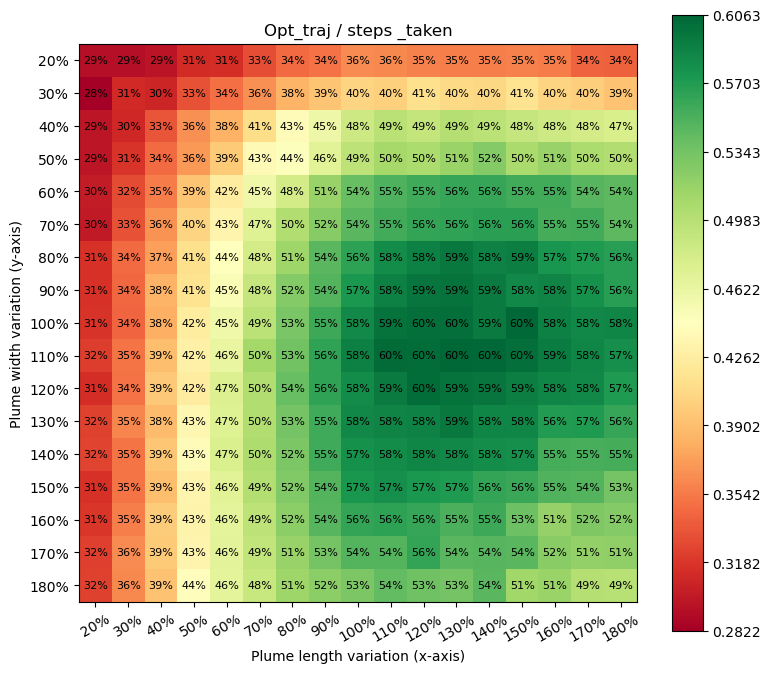

In [45]:
plt.figure(figsize=(9,8))
plt.title('Opt_traj / steps _taken')

plt.imshow(extra_proportion_grid.T, cmap='RdYlGn')
plt.colorbar(ticks=np.linspace(np.min(extra_proportion), np.max(extra_proportion), 10))

for i in range(17):
    for j in range(17):
        plt.annotate(f'{int(extra_proportion_grid[i,j]*100)}%', (i,j), ha='center', va='center', fontsize=8)

plt.xticks(list(range(17)), [f'{i*10}%' for i in range(2,19)], rotation=30)
plt.yticks(list(range(17)), [f'{i*10}%' for i in range(2,19)])

plt.xlabel('Plume length variation (x-axis)')
plt.ylabel('Plume width variation (y-axis)')

plt.show()

# Extra steps filtered

In [46]:
extra_steps_filt = []

for f in files:
    df = pd.read_csv(folder + f)
    df_filt = df.loc[df['steps_taken'] != 1001]
    extra_steps_filt.append((df_filt['extra_steps']).mean())

extra_steps_filt = np.array(extra_steps_filt)

In [47]:
extra_steps_filt_grid = extra_steps_filt.reshape((17,17))

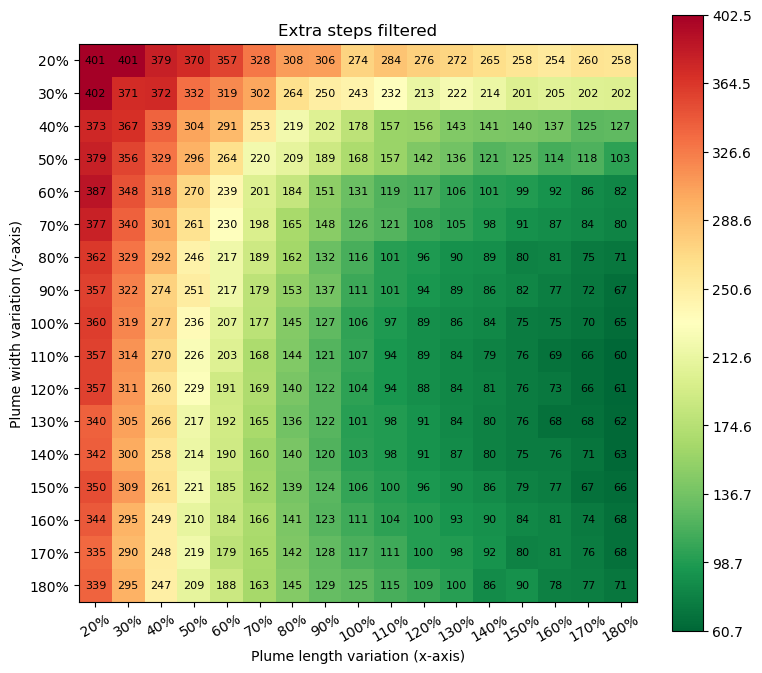

In [50]:
plt.figure(figsize=(9,8))
plt.title('Extra steps filtered')

plt.imshow(extra_steps_filt_grid.T, cmap='RdYlGn_r')
plt.colorbar(ticks=np.linspace(np.min(extra_steps_filt_grid), np.max(extra_steps_filt_grid), 10))

for i in range(17):
    for j in range(17):
        plt.annotate(f'{int(extra_steps_filt_grid[i,j])}', (i,j), ha='center', va='center', fontsize=8)

plt.xticks(list(range(17)), [f'{i*10}%' for i in range(2,19)], rotation=30)
plt.yticks(list(range(17)), [f'{i*10}%' for i in range(2,19)])

plt.xlabel('Plume length variation (x-axis)')
plt.ylabel('Plume width variation (y-axis)')

plt.show()